<a href="https://colab.research.google.com/github/Zen0007/linear_Regression/blob/main/prakteck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [324]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [325]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [326]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t',sep=' ', skipinitialspace=True)

In [327]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [328]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [329]:
dataset=dataset.fillna(dataset.mean(),inplace=False)

In [330]:
dataset['Origin']= dataset['Origin'].map({1:'USA', 2:'Eropa', 3:'Japan'})

In [331]:
dataset = pd.get_dummies(dataset,columns=['Origin'],prefix='',prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Eropa,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [332]:
train_dataset=dataset.sample(frac=0.8,random_state=0)
test_datase= dataset.drop(train_dataset.index)

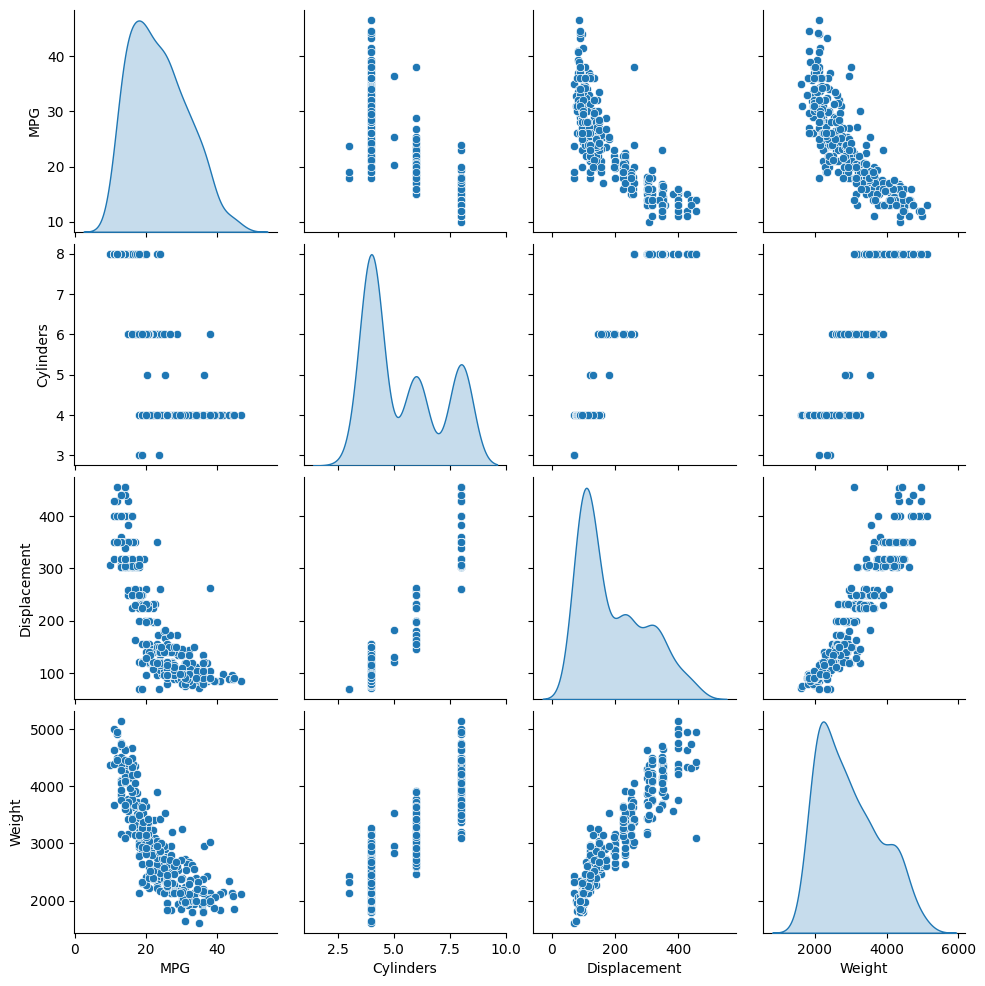

In [333]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']],diag_kind='kde')


In [334]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,318.0,23.590566,7.913617,10.0,17.125,22.75,29.00,46.6
Cylinders,318.0,5.427673,1.682941,3.0,4.000,4.00,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.250,151.00,259.50,455.0
Horsepower,318.0,104.073418,38.368477,46.0,75.250,92.00,120.00,230.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.250,2792.50,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.900,15.50,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.000,76.00,79.00,82.0
Eropa,318.0,0.163522,0.370424,0.0,0.000,0.00,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.000,0.00,0.00,1.0
USA,318.0,0.641509,0.480313,0.0,0.000,1.00,1.00,1.0


In [335]:
train_feature = train_dataset.copy()
test_feature = train_dataset.copy()

train_label = train_feature.pop('MPG')
test_label = test_feature.pop('MPG')

In [336]:
train_dataset.describe().transpose()[['mean','std']]

,mean,std
MPG,23.590566,7.913617
Cylinders,5.427673,1.682941
Displacement,193.061321,103.812742
Horsepower,104.073418,38.368477
Weight,2963.823899,844.749805
Acceleration,15.595912,2.796282
Model Year,75.946541,3.705266
Eropa,0.163522,0.370424
Japan,0.194969,0.396801
USA,0.641509,0.480313


normalisazion 


In [337]:
normalisasi = tf.keras.layers.Normalization(axis=-1)

In [338]:
normalisasi.adapt(np.array(train_feature))

In [339]:
print(normalisasi.mean.numpy())

[[5.42767286e+00 1.93061325e+02 1.04073425e+02 2.96382397e+03
  1.55959129e+01 7.59465408e+01 1.63522020e-01 1.94968581e-01
  6.41509414e-01]]


In [340]:
first = np .array(train_feature[:1])

with np.printoptions(precision=2,suppress=True):
  print('first example:',first)
  print()
  print('normalized:',normalisasi(first).numpy())

first example: [[   8.  351.  153. 4129.   13.   72.    0.    0.    1.]]

normalized: [[ 1.53  1.52  1.28  1.38 -0.93 -1.07 -0.44 -0.49  0.75]]


In [341]:
horspower = np.array(train_feature['Horsepower'])

horspower_normalisasion = layers.Normalization(input_shape=[1,],axis=None)
horspower_normalisasion.adapt(horspower)

In [360]:
horspower_model= tf.keras.Sequential([
    horspower_normalisasion,
    layers.Dense(units=1)
])
horspower_model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_35 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [361]:
horspower_model.predict(horspower[:10])

1/1 [==============================] - 0s 53ms/step


array([[-1.6389142 ],
       [ 0.9738849 ],
       [-1.2034478 ],
       [ 0.5719158 ],
       [ 0.13644926],
       [ 1.1748694 ],
       [ 1.3088592 ],
       [ 0.47142354],
       [-1.538422  ],
       [-0.198525  ]], dtype=float32)

In [362]:
horspower_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),loss='mean_absolute_error')

In [377]:
%%time
history = horspower_model.fit(
    train_feature['Horsepower'],
    train_label,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 4.03 s, sys: 144 ms, total: 4.17 s
Wall time: 5.19 s


In [378]:
hist= pd.DataFrame(history.history) 
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.994780,3.951411,95
96,3.994451,3.963991,96
97,3.992757,3.955706,97
98,3.992661,3.954275,98
99,3.994627,3.951657,99


In [410]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='vas_loss')
  plt.ylim([0,10])
  plt.xlabel('Epoch')
  plt.ylabel('Error[MPG]')
  plt.legend()
  plt.grid(True)

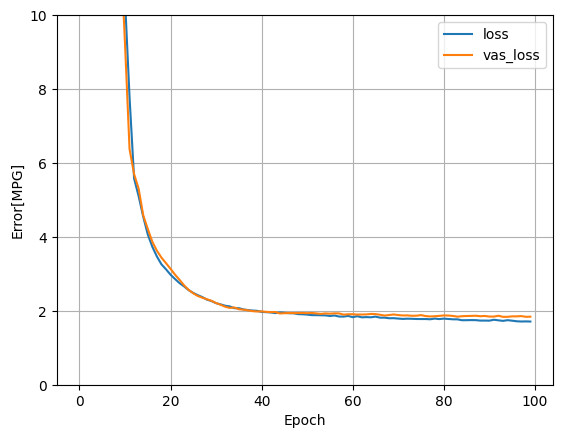

In [411]:
plot_loss(history)

In [366]:
test_resulet = {}
test_resulet['horspower_model']=horspower_model.evaluate(
    test_feature['Horsepower'],
    test_label,verbose=0
)

In [367]:
x = tf.linspace(0.0,250,251)
y = horspower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [384]:
def plot_horspower(x,y):
  plt.scatter(train_feature['Horsepower'],train_label,label='Data',color='red')
  plt.plot(x,y,color='k',label='prediction')
  plt.xlabel('Horsepowr')
  plt.ylabel('MPG')
  plt.legend()

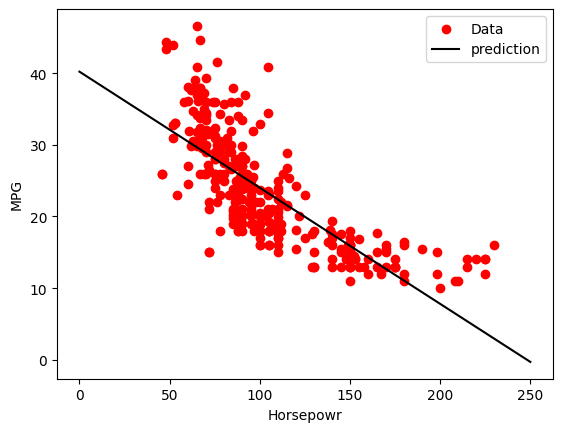

In [385]:
plot_horspower(x,y)

In [369]:
linear_model = tf.keras.Sequential([
    normalisasi,
    layers.Dense(units=1)
])

In [370]:
linear_model.predict(train_feature[:10])

1/1 [==============================] - 0s 53ms/step


array([[-0.47684592],
       [-0.6256038 ],
       [-0.25435483],
       [ 0.19751921],
       [-0.7659058 ],
       [-1.1602482 ],
       [ 0.43219417],
       [-1.16435   ],
       [-0.9806074 ],
       [ 0.17740047]], dtype=float32)

In [371]:
linear_model.layers[1].kernel

<tf.Variable 'dense_36/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.01233375],
       [ 0.2987808 ],
       [-0.48698747],
       [ 0.5435672 ],
       [ 0.085747  ],
       [ 0.62609744],
       [ 0.123101  ],
       [-0.00780743],
       [-0.3263571 ]], dtype=float32)>

In [387]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [388]:
%%time
history = linear_model.fit(
    train_feature,
    train_label,
    epochs=100,
    verbose=0,
    validation_batch_size=0.2
)

CPU times: user 1.94 s, sys: 78.4 ms, total: 2.02 s
Wall time: 3 s


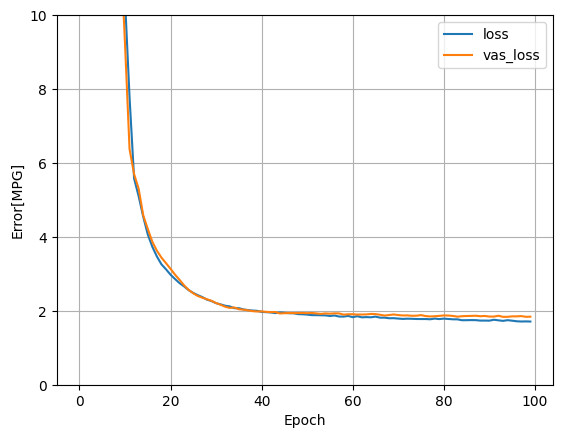

In [412]:
plot_loss(history)

In [391]:
test_resulet['linear_model'] = linear_model.evaluate(
    test_feature,test_label,verbose=0
)

In [392]:

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64,activation='relu'),
      layers.Dense(64,activation='relu'),
      layers.Dense(1)
    ])

  model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))
  return model


In [393]:
dnn_horspower_model = build_and_compile_model(horspower_normalisasion)

In [394]:
dnn_horspower_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_37 (Dense)            (None, 64)                128       
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dense_39 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [395]:
%%time
history = dnn_horspower_model.fit(
    train_feature['Horsepower'],
    train_label,
    validation_split=0.2,
    verbose=0,epochs=100
) 

CPU times: user 4.58 s, sys: 142 ms, total: 4.73 s
Wall time: 4.79 s


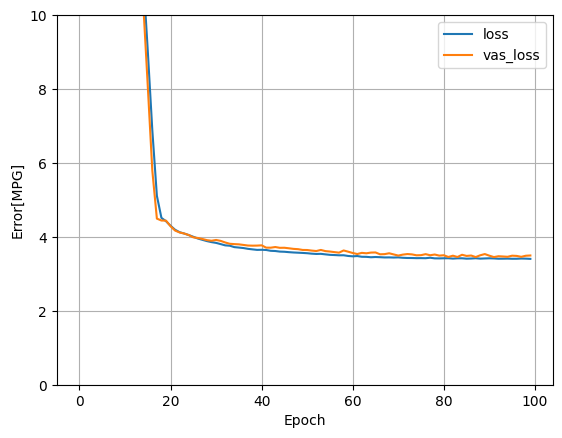

In [396]:
plot_loss(history)

In [397]:
x = tf.linspace(0.0,250,251)
y = dnn_horspower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


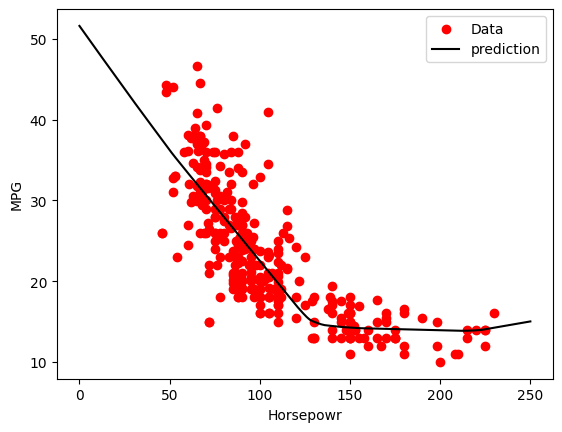

In [398]:
plot_horspower(x,y)

In [399]:
test_resulet['dnn_horspower_model'] = dnn_horspower_model.evaluate(
    test_feature['Horsepower'],test_label,
    verbose=0
)

In [400]:
dnn_model = build_and_compile_model(normalisasi)
dnn_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliza  (None, 9)                19        
 tion)                                                           
                                                                 
 dense_40 (Dense)            (None, 64)                640       
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dense_42 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [401]:
%%time 
history = dnn_model.fit(
    train_feature,
    train_label,
    validation_split=0.2,
    verbose=0,epochs=100
)

CPU times: user 4.52 s, sys: 151 ms, total: 4.67 s
Wall time: 4.94 s


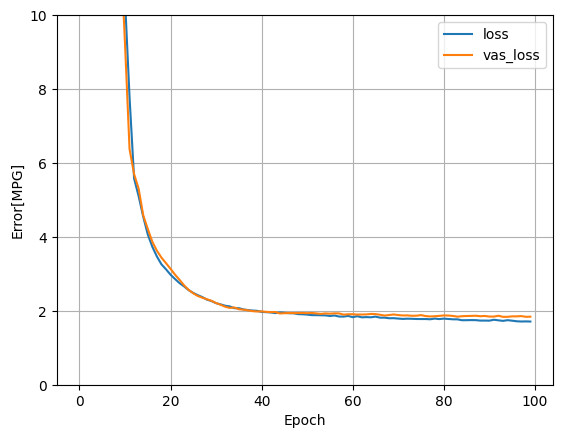

In [402]:
plot_loss(history)

In [403]:
test_resulet['dnn_model']= dnn_model.evaluate(test_feature,test_label,verbose=0)

In [404]:
pd.DataFrame(test_resulet,index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horspower_model,3.984456
linear_model,2.490804
dnn_horspower_model,3.422514
dnn_model,1.727198


10/10 [==============================] - 0s 2ms/step


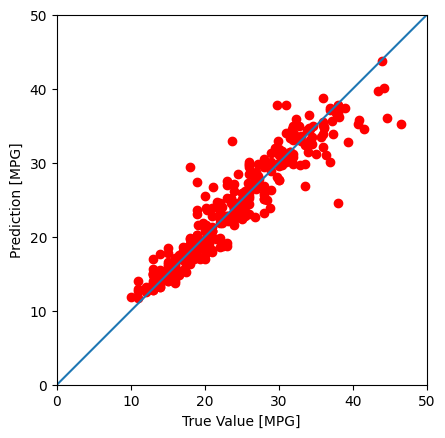

In [405]:
test_prediction = dnn_model.predict(test_feature).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_label,test_prediction,color='red')
plt.xlabel('True Value [MPG]')
plt.ylabel('Prediction [MPG]')
lims = [0,50]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims,lims)

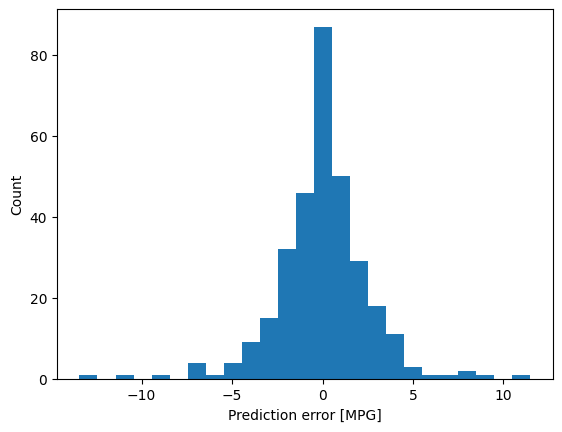

In [406]:
error = test_prediction-test_label
plt.hist(error , bins=25)
plt.xlabel('Prediction error [MPG]')
_=plt.ylabel('Count')

In [407]:
dnn_model.save('dnn_model')


In [408]:
reloade = tf.keras.models.load_model('dnn_model')

test_resulet['reloade'] = reloade.evaluate(
    test_feature,test_label,verbose=0
)

In [409]:
pd.DataFrame(test_resulet,index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horspower_model,3.984456
linear_model,2.490804
dnn_horspower_model,3.422514
dnn_model,1.727198
reloade,1.727198
